# Machine Learning Lab-2 Assignment-1

## Meer Ibadulla 

## Importing packages 

In [10]:
# For downloading dataset
from urllib.request import urlretrieve
import os

# For extracting dataset
import tarfile

# For reading images
import cv2

# Essentials 
import numpy as np
import pandas as pd

# pretty printing python objects
import pprint

# for sorting dictionary by value
import operator

# for showing images inline
from matplotlib.pyplot import imshow 
%matplotlib inline 

# for making labels one-hot encoded
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical 

# for splitting data into training and validation data
from sklearn.model_selection import train_test_split

# for CNN and NN models
from keras.models import Sequential, Model
from keras.layers import Conv2D, Input, Dropout, Activation, Dense, MaxPooling2D, Flatten, GlobalAveragePooling2D
from keras.optimizers import Adadelta
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.models import load_model

In [11]:
def extract_dataset(dataset_file_path, extraction_directory):
    if (not os.path.exists(extraction_directory)):
        os.makedirs(extraction_directory)
    if (dataset_file_path.endswith("tar.gz") or dataset_file_path.endswith(".tgz")):
        tar = tarfile.open(dataset_file_path, "r:gz")
        tar.extractall(path=extraction_directory)
        tar.close()
    elif (dataset_file_path.endswith("tar")):
        tar = tarfile.open(dataset_file_path, "r:")
        tar.extractall(path=extraction_directory)
        tar.close()
    print("Done")

extract_dataset('101_ObjectCategories.tar.gz','./data/')

Done


##  Exploring dataset

In [73]:
def get_images(object_category, data_directory):
    if (not os.path.exists(data_directory)):
        print("Data directory not found !!!! ")
        return
    obj_category_dir = os.path.join(os.path.join(data_directory,"101_ObjectCategories"),object_category)
    images = [os.path.join(obj_category_dir,img) for img in os.listdir(obj_category_dir)]
    return images

def read_image(image_path):
    """Read and resize individual images - Caltech 101 avg size of image is 300x200, so we resize accordingly"""
    img = cv2.imread(image_path, cv2.IMREAD_COLOR)
    img = cv2.resize(img, (300,200), interpolation=cv2.INTER_CUBIC)
    return img

In [19]:
ant_imgs = get_images('ant','./data')


In [20]:
ant_imgs[0]


'./data\\101_ObjectCategories\\ant\\image_0001.jpg'

In [21]:
ant_test_img = read_image(ant_imgs[0])


In [22]:
ant_test_img.shape


(200, 300, 3)

## How many images for each category in Caltech 101 dataset 

In [13]:
## Building function to read number of images in the folders

def return_images_per_category(data_directory):
    categories = os.listdir(data_directory+"/101_ObjectCategories/")
    object_images_count_dict = {}
    for category in categories:
        object_images_count_dict[category] = len(os.listdir(data_directory+"/101_ObjectCategories/"+category))
    object_images_count_dict = sorted(object_images_count_dict.items(), key=operator.itemgetter(1), reverse=True)
    return object_images_count_dict

In [24]:
return_images_per_category('./data')


[('airplanes', 800),
 ('Motorbikes', 798),
 ('BACKGROUND_Google', 468),
 ('Faces', 435),
 ('Faces_easy', 435),
 ('watch', 239),
 ('Leopards', 200),
 ('bonsai', 128),
 ('car_side', 123),
 ('ketch', 114),
 ('chandelier', 107),
 ('hawksbill', 100),
 ('grand_piano', 99),
 ('brain', 98),
 ('butterfly', 91),
 ('helicopter', 88),
 ('menorah', 87),
 ('kangaroo', 86),
 ('starfish', 86),
 ('trilobite', 86),
 ('buddha', 85),
 ('ewer', 85),
 ('sunflower', 85),
 ('scorpion', 84),
 ('revolver', 82),
 ('laptop', 81),
 ('ibis', 80),
 ('llama', 78),
 ('minaret', 76),
 ('electric_guitar', 75),
 ('umbrella', 75),
 ('crab', 73),
 ('crayfish', 70),
 ('cougar_face', 69),
 ('dragonfly', 68),
 ('dalmatian', 67),
 ('ferry', 67),
 ('flamingo', 67),
 ('lotus', 66),
 ('dolphin', 65),
 ('elephant', 64),
 ('euphonium', 64),
 ('joshua_tree', 64),
 ('soccer_ball', 64),
 ('stop_sign', 64),
 ('schooner', 63),
 ('chair', 62),
 ('lamp', 61),
 ('yin_yang', 60),
 ('cellphone', 59),
 ('rhino', 59),
 ('stegosaurus', 59),
 ('

In [25]:
len(return_images_per_category('./data'))


102

### There are 101 categories and most of them are irrelavent to the use case for helping a blind man, choosing 10 categories that are helpful  

Choosing the following categories :

chair
headphone
ceiling_fan
chandelier
cup
dollar_bill
Faces
watch
grand_piano
scissors

In [26]:
total_count = 0
for category,count in return_images_per_category('./data'):
    if category == 'chair' or category == 'headphone' or category == 'ceiling_fan' or category == 'chandelier' or category == 'cup' or category == 'dollar_bill' or category == 'Faces' or category == 'watch' or category == 'grand_piano' or category == 'scissors'  :
     total_count += count
    else: 
        continue 
print("Total number of images in training data : ",total_count)

Total number of images in training data :  1179


### Creating data for Deep learning 

In [90]:
def create_training_data(data_directory):
    i = 0
    X = np.ndarray((1179, 200, 300, 3), dtype=np.uint8)
    Y = []
    print("Preparing X and Y for dataset...")
    for category,_ in return_images_per_category(data_directory):
          if category == 'chair' or category == 'headphone' or category == 'ceiling_fan' or category == 'chandelier' or category == 'cup' or category == 'dollar_bill' or category == 'Faces' or category == 'watch' or category == 'grand_piano' or category == 'scissors' :
              print("Processing images of ",category)
              for image in get_images(category, data_directory):
                  if not image.endswith('.jpg'):
                  # to escape hidden ipynb checkpoints and other unnecessary files 
                    continue
                  X[i] = read_image(image)
                  Y.insert(i,category) 
                  i += 1
                  print("Images processed : ",i+1," of 1179")
    print("Datasets constructed")
    return X,Y

In [91]:
X, Y = create_training_data('./data')


Preparing X and Y for dataset...
Processing images of  Faces
Images processed :  2  of 1179
Images processed :  3  of 1179
Images processed :  4  of 1179
Images processed :  5  of 1179
Images processed :  6  of 1179
Images processed :  7  of 1179
Images processed :  8  of 1179
Images processed :  9  of 1179
Images processed :  10  of 1179
Images processed :  11  of 1179
Images processed :  12  of 1179
Images processed :  13  of 1179
Images processed :  14  of 1179
Images processed :  15  of 1179
Images processed :  16  of 1179
Images processed :  17  of 1179
Images processed :  18  of 1179
Images processed :  19  of 1179
Images processed :  20  of 1179
Images processed :  21  of 1179
Images processed :  22  of 1179
Images processed :  23  of 1179
Images processed :  24  of 1179
Images processed :  25  of 1179
Images processed :  26  of 1179
Images processed :  27  of 1179
Images processed :  28  of 1179
Images processed :  29  of 1179
Images processed :  30  of 1179
Images processed : 

In [92]:
X.shape

(1179, 200, 300, 3)

## Each Sample image of Class chosen 

---------- Faces ----------


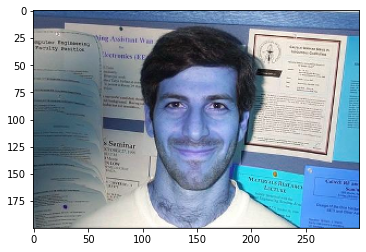

In [228]:
print('-'*10, Y[233], '-'*10 )
imshow(X[233])

---------- watch ----------


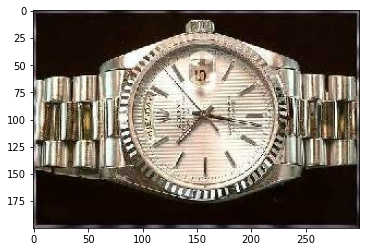

In [227]:
print('-'*10, Y[450], '-'*10 )
imshow(X[450])

---------- chandelier ----------


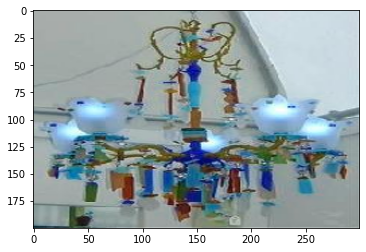

In [229]:
print('-'*10, Y[680], '-'*10 )
imshow(X[680])

---------- grand_piano ----------


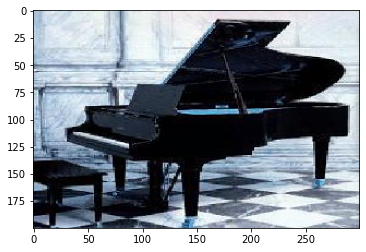

In [230]:
print('-'*10, Y[790], '-'*10 )
imshow(X[790])

---------- chair ----------


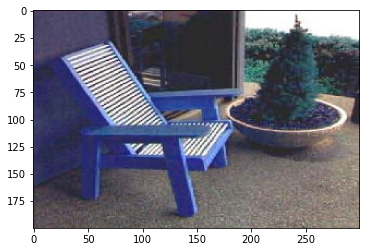

In [231]:
print('-'*10, Y[885], '-'*10 )
imshow(X[885])

---------- cup ----------


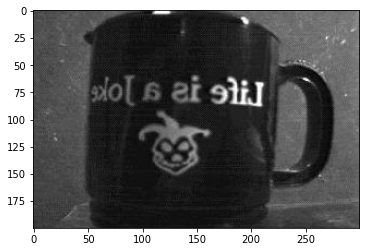

In [233]:
print('-'*10, Y[970], '-'*10 )
imshow(X[970])

---------- dollar_bill ----------


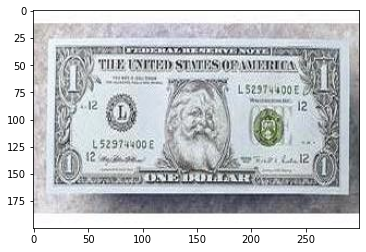

In [234]:
print('-'*10, Y[1010], '-'*10 )
imshow(X[1010])

---------- ceiling_fan ----------


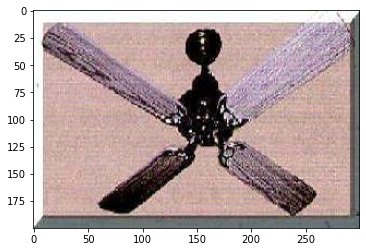

In [237]:
print('-'*10, Y[1070], '-'*10 )
imshow(X[1070])

---------- headphone ----------


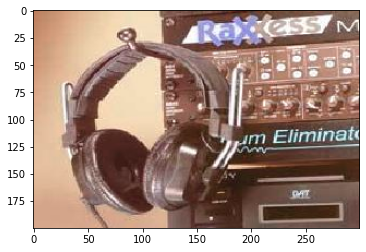

In [238]:
print('-'*10, Y[1120], '-'*10 )
imshow(X[1120])

---------- scissors ----------


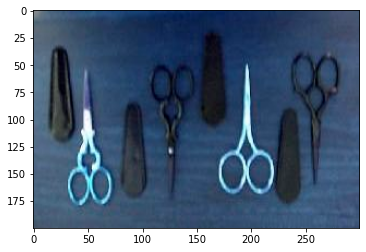

In [240]:
print('-'*10, Y[1155], '-'*10 )
imshow(X[1155])

## One hot encoding the labels 

In [19]:
label_encoder = LabelEncoder()
Y_integer_encoded = label_encoder.fit_transform(Y)
Y_integer_encoded

array([0, 0, 0, ..., 8, 8, 8], dtype=int64)

In [44]:
np.save('label_encoder.npy', label_encoder.classes_)


In [94]:
label_encoder.classes_

array(['Faces', 'ceiling_fan', 'chair', 'chandelier', 'cup',
       'dollar_bill', 'grand_piano', 'headphone', 'scissors', 'watch'],
      dtype='<U11')

In [20]:
len(Y_integer_encoded)


1179

In [46]:
len(Y)


1179

In [47]:
len(X)


1179

Creating one hot encoding for the Y label classes 10 column classes 

In [21]:
Y_one_hot = to_categorical(Y_integer_encoded)
Y_one_hot

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [22]:
Y_one_hot[0]


array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [23]:
len(Y_one_hot[0])


10

Normalizing images to float and dividing by 255 to reach solution faster 

In [24]:
X_normalized = X.astype(np.float64) / 255


In [16]:
X_normalized[0]


array([[[0.17254902, 0.21960784, 0.23529412],
        [0.20784314, 0.25490196, 0.2627451 ],
        [0.23529412, 0.27058824, 0.27058824],
        ...,
        [0.49411765, 0.50980392, 0.51372549],
        [0.4745098 , 0.49019608, 0.49411765],
        [0.43921569, 0.45490196, 0.45882353]],

       [[0.25098039, 0.29411765, 0.30980392],
        [0.29019608, 0.3254902 , 0.3372549 ],
        [0.29803922, 0.32941176, 0.33333333],
        ...,
        [0.57647059, 0.59215686, 0.59607843],
        [0.55294118, 0.56862745, 0.57254902],
        [0.50588235, 0.52156863, 0.5254902 ]],

       [[0.4       , 0.42745098, 0.44313725],
        [0.48627451, 0.51764706, 0.52941176],
        [0.52156863, 0.54509804, 0.54901961],
        ...,
        [0.58431373, 0.6       , 0.60392157],
        [0.55686275, 0.57254902, 0.57647059],
        [0.49803922, 0.51372549, 0.51764706]],

       ...,

       [[0.42352941, 0.47843137, 0.47058824],
        [0.49411765, 0.54901961, 0.54117647],
        [0.50196078, 0

### Splitting data in test and training 

In [26]:

X_train, X_validation, Y_train, Y_validation = train_test_split(X_normalized, Y_one_hot, test_size=0.30, random_state=42)

In [27]:
print('Number of data points in train data:', X_train.shape[0])
print('Number of data points in Validation data:', X_validation.shape[0])

Number of data points in train data: 825
Number of data points in Validation data: 354


Train: X=(825, 200, 300, 3), y=(825, 10)
Test: X=(354, 200, 300, 3), y=(354, 10)


ValueError: num must be 1 <= num <= 12, not 0

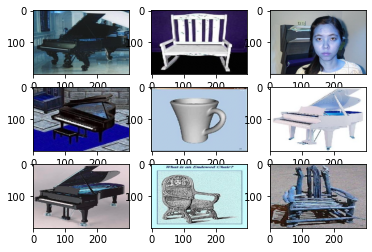

In [222]:
from matplotlib import pyplot

# loaded dataset
print('Train: X=%s, y=%s' % (X_train.shape, Y_train.shape))
print('Test: X=%s, y=%s' % (X_validation.shape, Y_validation.shape))
# plot first few images
for i in range(15):

  pyplot.subplot(330 + 1 + i)
  pyplot.imshow(X_train[i])
# show the figure
pyplot.show()

In [28]:
X_train.shape


(825, 200, 300, 3)

In [29]:
Y_train.shape


(825, 10)

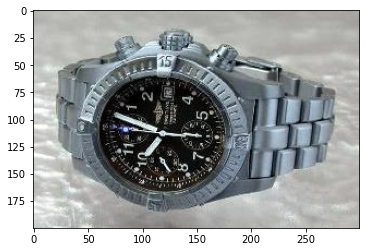

In [30]:
imshow(X_train[115])

# Modeling CNN for the dataset 



### Model Architecture 

In [68]:
model_cnn = Sequential()

# Creating a conv layer 16 feature maps/filters and a 3 x 3 convulation window   
model_cnn.add(Conv2D(18, (3,3), activation='relu', input_shape=(200,300,3)))
# Creating a conv layer 32 feature maps/filters and a 3 x 3 convulation window   
model_cnn.add(Conv2D(34, (3,3), activation='relu'))
# Max pooling with a 2x2 window and stride of 2 
model_cnn.add(MaxPooling2D(pool_size=2, strides=2))
model_cnn.add(Conv2D(64, (3,3), activation='relu'))
model_cnn.add(Conv2D(128, (3,3), activation='relu'))
model_cnn.add(MaxPooling2D(pool_size=2, strides=2))
model_cnn.add(Flatten())
model_cnn.add(Dense(10, activation='softmax'))
model_cnn.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 198, 298, 18)      504       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 196, 296, 34)      5542      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 98, 148, 34)       0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 96, 146, 64)       19648     
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 94, 144, 128)      73856     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 47, 72, 128)       0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 433152)           

###  Defining Loss parameters and Optimizer 

In [69]:
model_cnn.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [70]:
callbacks = [ModelCheckpoint('cnn_model.h5', monitor='val_acc', save_best_only=True),
            EarlyStopping(monitor='val_loss', patience=4, verbose=1, mode='auto')]
model_cnn.fit(X_train, Y_train, batch_size=64, epochs=30, verbose=1, validation_data=(X_validation,Y_validation), callbacks=callbacks)

Epoch 1/30
13/13 [==============================] - 79s 6s/step - loss: 4.1466 - accuracy: 0.2703 - val_loss: 1.6202 - val_accuracy: 0.5876
Epoch 2/30
13/13 [==============================] - 75s 6s/step - loss: 1.3043 - accuracy: 0.6364 - val_loss: 1.0934 - val_accuracy: 0.6893
Epoch 3/30
13/13 [==============================] - 74s 6s/step - loss: 0.7634 - accuracy: 0.7709 - val_loss: 1.0976 - val_accuracy: 0.7062
Epoch 4/30
13/13 [==============================] - 75s 6s/step - loss: 0.4410 - accuracy: 0.8630 - val_loss: 1.0444 - val_accuracy: 0.7316
Epoch 5/30
13/13 [==============================] - 74s 6s/step - loss: 0.2010 - accuracy: 0.9406 - val_loss: 1.4096 - val_accuracy: 0.7429
Epoch 6/30
13/13 [==============================] - 75s 6s/step - loss: 0.0779 - accuracy: 0.9782 - val_loss: 1.3686 - val_accuracy: 0.7316
Epoch 7/30
13/13 [==============================] - 85s 7s/step - loss: 0.0467 - accuracy: 0.9855 - val_loss: 1.3175 - val_accuracy: 0.7401
Epoch 8/30
13/13 [==

In [64]:
# to save models
import json

# for saving environment of notebook
import dill
import sys
import pickle


In [22]:
pip install -U keras-tuner



  Created wheel for keras-tuner: filename=keras_tuner-1.0.2-py3-none-any.whl size=78936 sha256=0ca36f31aae5450f105acf874a3b962d7e3df540ac44fe9f122da0d18ac55d2c
  Stored in directory: c:\users\meeri\appdata\local\pip\cache\wheels\53\3d\c3\160c686bd74a18989843fcd015e8f6954ca8d834fd2ef4658a
  Created wheel for terminaltables: filename=terminaltables-3.1.0-py3-none-any.whl size=15353 sha256=acab6b9da7a3148720b74a3982cb4c8c9f25d365cec27bfbaa66f43e774d1b16
  Stored in directory: c:\users\meeri\appdata\local\pip\cache\wheels\08\8f\5f\253d0105a55bd84ee61ef0d37dbf70421e61e0cd70cef7c5e1
Successfully built keras-tuner terminaltables


In [3]:
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

In [2]:
import tensorflow as tf
from tensorflow import keras

In [6]:
import time
LOG_DIR = f"{int(time.time())}"

In [45]:
def build_model(hp):  # random search passes this hyperparameter() object 
    model = keras.models.Sequential()
    
    model.add(Conv2D(hp.Int('input_units',min_value=32,max_value=256,step=32), (3, 3), input_shape=(200,300,3)))
    model.add(Activation('relu'))
    model.add(Conv2D(hp.Int('input_units',min_value=32,max_value=256,step=32), (3, 3), input_shape=(200,300,3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=2, strides=2))
     
    model.add(Conv2D(hp.Int('input_units',min_value=32,max_value=256,step=32), (3, 3), input_shape=(200,300,3)))
    model.add(Activation('relu'))
    model.add(Conv2D(hp.Int('input_units',min_value=32,max_value=256,step=32), (3, 3), input_shape=(200,300,3)))
    model.add(MaxPooling2D(pool_size=2, strides=2))   
    
      
    model.add(Flatten()) 
    model.add(Dense(10))
    model.add(Activation("softmax"))

    model.compile(optimizer="adam",
                  loss="categorical_crossentropy",
                  metrics=["accuracy"])
    
    return model

In [48]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=1,  # how many model variations to test?
    executions_per_trial=2 )# how many trials per variation? (same model could perform differently

tuner.search(x=X_train,
             y=Y_train,
             verbose=1,
             epochs=3,
             batch_size=64,
             validation_data=(X_validation, Y_validation))

Trial 1 Complete [00h 31m 24s]
val_accuracy: 0.6567796468734741

Best val_accuracy So Far: 0.6567796468734741
Total elapsed time: 00h 31m 24s
INFO:tensorflow:Oracle triggered exit


In [49]:
tuner.get_best_hyperparameters()[0].values


{'input_units': 96}

In [50]:
tuner.get_best_models()[0].summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 298, 96)      2688      
_________________________________________________________________
activation (Activation)      (None, 198, 298, 96)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 196, 296, 96)      83040     
_________________________________________________________________
activation_1 (Activation)    (None, 196, 296, 96)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 98, 148, 96)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 96, 146, 96)       83040     
_________________________________________________________________
activation_2 (Activation)    (None, 96, 146, 96)       0

In [51]:
tuner.results_summary()



Results summary
Results in .\untitled_project
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
input_units: 96
Score: 0.6567796468734741


In [52]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4431073945426431041
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 12625648074802976891
physical_device_desc: "device: XLA_CPU device"
]


## CNN Model with Dropout for better accuracy 

In [59]:
model_cnn_dropout = Sequential()
model_cnn_dropout.add(Conv2D(32, (3,3), activation='relu', input_shape=(200,300,3)))
model_cnn_dropout.add(Conv2D(32, (3,3), activation='relu'))
model_cnn_dropout.add(MaxPooling2D(pool_size=2, strides=2))
model_cnn_dropout.add(Conv2D(64, (3,3), activation='relu'))
model_cnn_dropout.add(Conv2D(64, (3,3), activation='relu'))
model_cnn_dropout.add(MaxPooling2D(pool_size=2, strides=2))
model_cnn_dropout.add(Flatten())
model_cnn_dropout.add(Dense(512, activation='relu'))
model_cnn_dropout.add(Dropout(0.5))
model_cnn_dropout.add(Dense(10, activation='softmax'))
model_cnn_dropout.summary()

# loss and optimizer
model_cnn_dropout.compile(loss='categorical_crossentropy',optimizer='sgd', metrics=['accuracy'])

# training
callbacks = [ModelCheckpoint('cnn_model_dropout_two.h5', monitor='val_acc', save_best_only=True),
            EarlyStopping(monitor='val_loss', patience=4, verbose=1, mode='auto')]
model_cnn_dropout.fit(X_train, Y_train, batch_size=16, epochs=10, verbose=1, validation_data=(X_validation,Y_validation), callbacks=callbacks)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 198, 298, 32)      896       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 196, 296, 32)      9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 98, 148, 32)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 96, 146, 64)       18496     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 94, 144, 64)       36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 47, 72, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 216576)           

##### Training without pre dense layer 

In [62]:
model_cnn_dropout = Sequential()
model_cnn_dropout.add(Conv2D(32, (3,3), activation='relu', input_shape=(200,300,3)))
model_cnn_dropout.add(Conv2D(32, (3,3), activation='relu'))
model_cnn_dropout.add(MaxPooling2D(pool_size=2, strides=2))
model_cnn_dropout.add(Conv2D(64, (3,3), activation='relu'))
model_cnn_dropout.add(Conv2D(64, (3,3), activation='relu'))
model_cnn_dropout.add(MaxPooling2D(pool_size=2, strides=2))
model_cnn_dropout.add(Flatten())
model_cnn_dropout.add(Dropout(0.5))
model_cnn_dropout.add(Dense(10, activation='softmax'))
model_cnn_dropout.summary()

# loss and optimizer
model_cnn_dropout.compile(loss='categorical_crossentropy',optimizer='sgd', metrics=['accuracy'])

# training
callbacks = [ModelCheckpoint('cnn_model_dropout_three.h5', monitor='val_acc', save_best_only=True),
            EarlyStopping(monitor='val_loss', patience=4, verbose=1, mode='auto')]
model_cnn_dropout.fit(X_train, Y_train, batch_size=16, epochs=10, verbose=1, validation_data=(X_validation,Y_validation), callbacks=callbacks)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 198, 298, 32)      896       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 196, 296, 32)      9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 98, 148, 32)       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 96, 146, 64)       18496     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 94, 144, 64)       36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 47, 72, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 216576)           

In [71]:
model_cnn.save("model_cnn.h5")


In [130]:
from keras.preprocessing import image
import numpy as np

### Prediction for Chair (Array[2])


In [74]:
chair_imgs = get_images('chair','./data')


In [104]:
chair_imgs[0]


'./data\\101_ObjectCategories\\chair\\image_0001.jpg'

In [108]:

from PIL import Image  

In [116]:
im = Image.open(r"data/101_ObjectCategories/chair/image_0001.jpg")  
  


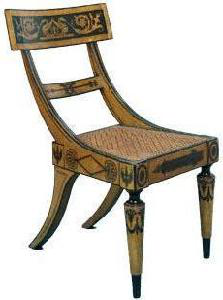

In [117]:
im

In [122]:
img = read_image(chair_imgs[0])

In [123]:
img.shape


(200, 300, 3)

In [78]:
img = img.reshape((1,200,300,3))

In [96]:
prediction = model_cnn.predict_classes(img)


In [99]:
label_encoder.classes_

array(['Faces', 'ceiling_fan', 'chair', 'chandelier', 'cup',
       'dollar_bill', 'grand_piano', 'headphone', 'scissors', 'watch'],
      dtype='<U11')

In [98]:
prediction

array([2], dtype=int64)

## Picture Downloaded from google to test the model built totally random 

In [140]:
chair_img2 = image.load_img('chair_google_pic.jfif',target_size=(200,300))

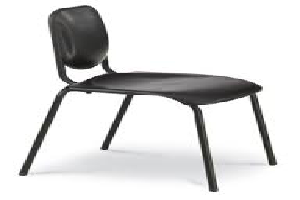

In [141]:
chair_img2

In [150]:
x_chair=image.img_to_array(chair_img2)
x_chair=np.expand_dims(x_chair,axis=0)


In [151]:
x_chair.shape

(1, 200, 300, 3)

In [152]:
pred_chair =model_cnn.predict_classes(x_chair)
pred_chair

array([2], dtype=int64)

### Prediction for Headphone (Array[7])

In [118]:
headphone_imgs = get_images('headphone','./data')

In [119]:
headphone_imgs[15]

'./data\\101_ObjectCategories\\headphone\\image_0016.jpg'

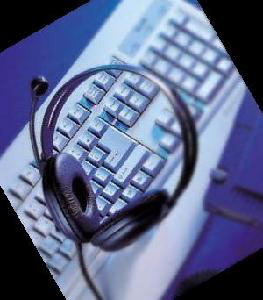

In [121]:
hp = Image.open(r"data/101_ObjectCategories/headphone/image_0016.jpg")  
hp

In [124]:
img_hp = read_image(headphone_imgs[15])

In [125]:
img_hp = img_hp.reshape((1,200,300,3))

In [127]:
prediction_hp = model_cnn.predict_classes(img_hp)
prediction_hp

array([7], dtype=int64)

In [128]:
label_encoder.classes_

array(['Faces', 'ceiling_fan', 'chair', 'chandelier', 'cup',
       'dollar_bill', 'grand_piano', 'headphone', 'scissors', 'watch'],
      dtype='<U11')

### Headphone picture downloaded from Google 

In [153]:
headphone_img2 = image.load_img('headphone_google_pic.jfif',target_size=(200,300))

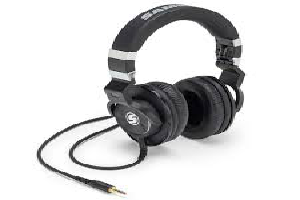

In [154]:
headphone_img2

In [155]:
x_headphone=image.img_to_array(headphone_img2)
x_headphone=np.expand_dims(x_headphone,axis=0)

In [156]:
x_headphone.shape

(1, 200, 300, 3)

In [157]:
pred_headphone =model_cnn.predict_classes(x_headphone)
pred_headphone

array([7], dtype=int64)

### Testing out the random watch pic to test the model prediction 

In [212]:
watch_img2 = image.load_img('watch_google_pic.jpg',target_size=(200,300))

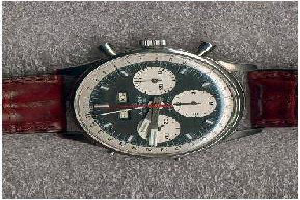

In [213]:
watch_img2

In [214]:
x_watch=image.img_to_array(watch_img2)
x_watch=np.expand_dims(x_watch,axis=0)

In [215]:
x_watch.shape

(1, 200, 300, 3)

In [216]:
pred_watch =model_cnn.predict_classes(x_watch)
pred_watch

array([9], dtype=int64)

In [209]:
label_encoder.classes_

array(['Faces', 'ceiling_fan', 'chair', 'chandelier', 'cup',
       'dollar_bill', 'grand_piano', 'headphone', 'scissors', 'watch'],
      dtype='<U11')